### 10.19 PM 5:55 start

In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [32]:
baseline_5th = pd.read_csv('yoyo_baseline_5th.csv', encoding = 'euc-kr')
baseline_1th = pd.read_csv('yoyo_baseline_1th.csv', encoding = 'euc-kr')

In [33]:
# KIDAG, KIDCU 제거

baseline_5th.drop(['KIDAG', 'KIDCU'], axis = 1, inplace = True)
baseline_1th.drop(['KIDAG', 'KIDCU'], axis = 1, inplace = True)

In [34]:
for col in baseline_5th.columns: 
    print(col, baseline_5th[col].isna().sum())

기수 0
EDATE 3365
NIHID 0
AGE 3365
SEX 0
HEIGHT 3365
WEIGHT 3368
WAIST 3373
GLU0_ORI 3366
R_GTP_TR 10030
AST_ORI 3366
ALT_ORI 3368
TCHL_ORI 3366
HDL_ORI 3366
TRIGLY_ORI 3368
HB_ORI 3366
SMOKE 3377
DRUGINS 3382
DRUGHT 3382
TREATD5 3379
DRUGICD 3382
DRUGLP 3382
FMHTN 3365
FMHEA 3365
FMDM 3365
PRT16_U 3375
TREATD14 3379
KID 3380
TOTALC 3405
PHYACTL 10030
PHYACTM 10030
PHYACTH 10030
BODYFAT 3403
MET_CAL 10030
PA_NEW 0
SBP 3396
DBP 3396
eGFR 3381
BMI 3368
DRK_NEW 0
CKD 6746
yoyo_03 0
yoyo_05 0
yoyo_07 0
yoyo_10 0
eGFR_change 3381
eGFR_change2 4630
FM_change1 4852
FM_change2 4962
FM_change3 4962


In [36]:
for col in baseline_1th.columns: 
    print(col, baseline_1th[col].isna().sum())

기수 0
EDATE 0
NIHID 0
AGE 0
SEX 0
HEIGHT 0
WEIGHT 5
WAIST 8
GLU0_ORI 299
R_GTP_TR 2
AST_ORI 2
ALT_ORI 5
TCHL_ORI 2
HDL_ORI 2
TRIGLY_ORI 3
HB_ORI 2
SMOKE 134
DRUGINS 585
DRUGHT 585
TREATD5 5482
DRUGICD 585
DRUGLP 585
FMHTN 0
FMHEA 0
FMDM 0
PRT16_U 37
TREATD14 5482
KID 4
TOTALC 306
PHYACTL 222
PHYACTM 297
PHYACTH 243
BODYFAT 2191
MET_CAL 385
PA_NEW 0
SBP 19
DBP 19
eGFR 2
BMI 5
DRK_NEW 0
CKD 6746
yoyo_03 0
yoyo_05 0
yoyo_07 0
yoyo_10 0
eGFR_change 3381
eGFR_change2 4630
FM_change1 4852
FM_change2 4962
FM_change3 4962


In [37]:
baseline_5th['PA_NEW'].unique()

array([0], dtype=int64)

------------------------------

#### PA_NEW 1기 값을 가져와서 채우기

In [38]:
mme = pd.read_csv('MME_.csv', encoding = 'euc-kr')
mme

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,R_GTP_TR,...,PHYACTM,PHYACTH,BODYFAT,MET_CAL,PA_NEW,SBP,DBP,eGFR,BMI,DRK_NEW
0,A01,200209.0,NIH1604000095,43.0,2,1.575,48.0,63.0,91.0,16.0,...,3.50,1.75,13400.0,2571.0,2,96.0,63.0,78.564168,19.349962,2
1,A01,200201.0,NIH1604000171,42.0,1,1.755,75.0,81.3,88.0,27.0,...,5.50,0.00,15700.0,2409.0,2,95.0,68.0,92.420166,24.350452,5
2,A01,200210.0,NIH1604000338,69.0,1,1.668,50.4,74.0,82.0,52.0,...,0.00,4.50,NaN,2407.5,2,138.0,69.0,86.839489,18.115004,1
3,A01,200201.0,NIH1604000362,48.0,2,1.556,53.6,76.4,110.0,38.0,...,0.75,0.75,14700.0,886.5,2,102.0,74.0,102.784214,22.138368,1
4,A01,200205.0,NIH1604000424,47.0,1,1.745,88.0,94.5,81.0,5.0,...,5.50,0.00,19500.0,2409.0,2,131.0,84.0,112.380813,28.899599,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,201303.0,NIH1604999643,55.0,2,1.641,60.9,74.0,88.0,NaN,...,NaN,NaN,17900.0,NaN,0,92.0,62.0,74.201919,22.615184,1
70206,A07,201407.0,NIH1604999732,75.0,1,1.632,50.8,81.3,110.0,NaN,...,NaN,NaN,10500.0,NaN,0,131.0,66.0,68.312024,19.073193,3
70207,A07,201409.0,NIH1604999772,55.0,1,1.635,66.2,88.3,85.0,NaN,...,NaN,NaN,13900.0,NaN,0,NaN,NaN,50.048887,24.764096,2
70208,A07,201403.0,NIH1604999929,53.0,2,1.530,63.2,85.3,95.0,NaN,...,NaN,NaN,27100.0,NaN,0,112.0,71.0,74.230720,26.998163,2


In [39]:
mme_A01 = mme.loc[mme['기수'] == 'A01']
mme_A01

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,R_GTP_TR,...,PHYACTM,PHYACTH,BODYFAT,MET_CAL,PA_NEW,SBP,DBP,eGFR,BMI,DRK_NEW
0,A01,200209.0,NIH1604000095,43.0,2,1.575,48.0,63.0,91.0,16.0,...,3.50,1.75,13400.0,2571.0,2,96.0,63.0,78.564168,19.349962,2
1,A01,200201.0,NIH1604000171,42.0,1,1.755,75.0,81.3,88.0,27.0,...,5.50,0.00,15700.0,2409.0,2,95.0,68.0,92.420166,24.350452,5
2,A01,200210.0,NIH1604000338,69.0,1,1.668,50.4,74.0,82.0,52.0,...,0.00,4.50,NaN,2407.5,2,138.0,69.0,86.839489,18.115004,1
3,A01,200201.0,NIH1604000362,48.0,2,1.556,53.6,76.4,110.0,38.0,...,0.75,0.75,14700.0,886.5,2,102.0,74.0,102.784214,22.138368,1
4,A01,200205.0,NIH1604000424,47.0,1,1.745,88.0,94.5,81.0,5.0,...,5.50,0.00,19500.0,2409.0,2,131.0,84.0,112.380813,28.899599,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A01,200109.0,NIH1604999643,43.0,2,1.644,61.0,71.3,85.0,8.0,...,2.50,0.00,16200.0,1689.0,2,99.0,71.0,90.587425,22.569722,1
10026,A01,200203.0,NIH1604999732,63.0,1,1.650,56.0,82.5,133.0,436.0,...,0.00,5.50,NaN,2788.5,2,140.0,98.0,95.070429,20.569330,3
10027,A01,200301.0,NIH1604999772,44.0,1,1.640,68.5,83.0,91.0,115.0,...,0.00,0.00,17200.0,495.0,1,128.0,94.0,81.212239,25.468471,5
10028,A01,200206.0,NIH1604999929,41.0,2,1.540,59.0,74.7,90.0,14.0,...,0.00,0.00,18100.0,693.0,2,102.0,74.0,107.964675,24.877720,2


In [40]:
mme_A01_panew = mme_A01[['NIHID', 'PA_NEW']]
mme_A01_panew

,NIHID,PA_NEW
0,NIH1604000095,2
1,NIH1604000171,2
2,NIH1604000338,2
3,NIH1604000362,2
4,NIH1604000424,2
...,...,...
10025,NIH1604999643,2
10026,NIH1604999732,2
10027,NIH1604999772,1
10028,NIH1604999929,2


In [41]:
baseline_5th = pd.merge(baseline_5th, mme_A01_panew, how = 'left', on = 'NIHID')
baseline_1th = pd.merge(baseline_1th, mme_A01_panew, how = 'left', on = 'NIHID')

In [43]:
baseline_1th['PA_NEW_y'].describe()

count    10030.000000
mean         1.683848
std          0.679052
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: PA_NEW_y, dtype: float64

In [44]:
baseline_5th.drop(['PA_NEW_x'], axis = 1, inplace = True)
baseline_5th.rename(columns = {'PA_NEW_y' : 'PA_NEW'}, inplace = True)
baseline_5th

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,R_GTP_TR,...,yoyo_03,yoyo_05,yoyo_07,yoyo_10,eGFR_change,eGFR_change2,FM_change1,FM_change2,FM_change3,PA_NEW
0,A05,201007.0,NIH1604000095,51.0,2,1.574,51.0,65.1,100.0,NaN,...,0.0,0.0,0.0,0.0,-22.158096,-8.785348,3000.0,1442.274843,1207.059327,2
1,A05,200911.0,NIH1604000171,50.0,1,1.755,79.8,85.9,92.0,NaN,...,0.0,0.0,0.0,0.0,4.216347,-7.389887,3600.0,3415.031409,3543.717726,2
2,A05,201008.0,NIH1604000338,77.0,1,1.665,53.3,80.7,94.0,NaN,...,0.0,0.0,0.0,0.0,-20.985646,-12.197233,NaN,NaN,NaN,2
3,A05,200911.0,NIH1604000362,56.0,2,1.555,51.3,77.3,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,-2800.0,NaN,NaN,2
4,A05,NaN,NIH1604000424,NaN,1,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A05,200909.0,NIH1604999643,51.0,2,1.650,60.1,70.2,77.0,NaN,...,1.0,1.0,1.0,1.0,-9.855736,-6.529770,500.0,-537.438675,-847.497536,2
10026,A05,201003.0,NIH1604999732,71.0,1,1.639,57.6,90.0,119.0,NaN,...,0.0,0.0,0.0,0.0,-32.066847,5.308442,NaN,NaN,NaN,2
10027,A05,NaN,NIH1604999772,NaN,1,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1
10028,A05,NaN,NIH1604999929,NaN,2,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2


In [45]:
baseline_1th.drop(['PA_NEW_x'], axis = 1, inplace = True)
baseline_1th.rename(columns = {'PA_NEW_y' : 'PA_NEW'}, inplace = True)
baseline_1th

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,R_GTP_TR,...,yoyo_03,yoyo_05,yoyo_07,yoyo_10,eGFR_change,eGFR_change2,FM_change1,FM_change2,FM_change3,PA_NEW
0,A01,200209.0,NIH1604000095,43.0,2,1.575,48.0,63.0,91.0,16.0,...,0.0,0.0,0.0,0.0,-22.158096,-8.785348,3000.0,1442.274843,1207.059327,2
1,A01,200201.0,NIH1604000171,42.0,1,1.755,75.0,81.3,88.0,27.0,...,0.0,0.0,0.0,0.0,4.216347,-7.389887,3600.0,3415.031409,3543.717726,2
2,A01,200210.0,NIH1604000338,69.0,1,1.668,50.4,74.0,82.0,52.0,...,0.0,0.0,0.0,0.0,-20.985646,-12.197233,NaN,NaN,NaN,2
3,A01,200201.0,NIH1604000362,48.0,2,1.556,53.6,76.4,110.0,38.0,...,0.0,0.0,0.0,0.0,NaN,NaN,-2800.0,NaN,NaN,2
4,A01,200205.0,NIH1604000424,47.0,1,1.745,88.0,94.5,81.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A01,200109.0,NIH1604999643,43.0,2,1.644,61.0,71.3,85.0,8.0,...,1.0,1.0,1.0,1.0,-9.855736,-6.529770,500.0,-537.438675,-847.497536,2
10026,A01,200203.0,NIH1604999732,63.0,1,1.650,56.0,82.5,133.0,436.0,...,0.0,0.0,0.0,0.0,-32.066847,5.308442,NaN,NaN,NaN,2
10027,A01,200301.0,NIH1604999772,44.0,1,1.640,68.5,83.0,91.0,115.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1
10028,A01,200206.0,NIH1604999929,41.0,2,1.540,59.0,74.7,90.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2


In [46]:
baseline_1th['PA_NEW'].value_counts()

2    5558
1    3244
3     843
0     385
Name: PA_NEW, dtype: int64

In [47]:
baseline_1th['DRK_NEW'].value_counts()

1    5248
2    2261
4     820
5     760
3     635
0     306
Name: DRK_NEW, dtype: int64

In [48]:
# 0은 다시 Nan 으로 바꾸기

baseline_1th['PA_NEW'] = baseline_1th['PA_NEW'].replace({0: np.nan})
baseline_1th['DRK_NEW'] = baseline_1th['DRK_NEW'].replace({0: np.nan})

baseline_5th['PA_NEW'] = baseline_5th['PA_NEW'].replace({0: np.nan})
baseline_5th['DRK_NEW'] = baseline_5th['DRK_NEW'].replace({0: np.nan})

In [49]:
baseline_5th

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,R_GTP_TR,...,yoyo_03,yoyo_05,yoyo_07,yoyo_10,eGFR_change,eGFR_change2,FM_change1,FM_change2,FM_change3,PA_NEW
0,A05,201007.0,NIH1604000095,51.0,2,1.574,51.0,65.1,100.0,NaN,...,0.0,0.0,0.0,0.0,-22.158096,-8.785348,3000.0,1442.274843,1207.059327,2.0
1,A05,200911.0,NIH1604000171,50.0,1,1.755,79.8,85.9,92.0,NaN,...,0.0,0.0,0.0,0.0,4.216347,-7.389887,3600.0,3415.031409,3543.717726,2.0
2,A05,201008.0,NIH1604000338,77.0,1,1.665,53.3,80.7,94.0,NaN,...,0.0,0.0,0.0,0.0,-20.985646,-12.197233,NaN,NaN,NaN,2.0
3,A05,200911.0,NIH1604000362,56.0,2,1.555,51.3,77.3,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,-2800.0,NaN,NaN,2.0
4,A05,NaN,NIH1604000424,NaN,1,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A05,200909.0,NIH1604999643,51.0,2,1.650,60.1,70.2,77.0,NaN,...,1.0,1.0,1.0,1.0,-9.855736,-6.529770,500.0,-537.438675,-847.497536,2.0
10026,A05,201003.0,NIH1604999732,71.0,1,1.639,57.6,90.0,119.0,NaN,...,0.0,0.0,0.0,0.0,-32.066847,5.308442,NaN,NaN,NaN,2.0
10027,A05,NaN,NIH1604999772,NaN,1,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
10028,A05,NaN,NIH1604999929,NaN,2,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0


In [50]:
baseline_5th['PA_NEW'].isna().sum()

385

In [51]:
baseline_5th['DRK_NEW'].isna().sum()

3405

In [52]:
baseline_1th['PA_NEW'].isna().sum()

385

In [54]:
baseline_1th['DRK_NEW'].isna().sum()

306

In [55]:
for col in baseline_1th.columns: 
    print(col, baseline_1th[col].isna().sum())

기수 0
EDATE 0
NIHID 0
AGE 0
SEX 0
HEIGHT 0
WEIGHT 5
WAIST 8
GLU0_ORI 299
R_GTP_TR 2
AST_ORI 2
ALT_ORI 5
TCHL_ORI 2
HDL_ORI 2
TRIGLY_ORI 3
HB_ORI 2
SMOKE 134
DRUGINS 585
DRUGHT 585
TREATD5 5482
DRUGICD 585
DRUGLP 585
FMHTN 0
FMHEA 0
FMDM 0
PRT16_U 37
TREATD14 5482
KID 4
TOTALC 306
PHYACTL 222
PHYACTM 297
PHYACTH 243
BODYFAT 2191
MET_CAL 385
SBP 19
DBP 19
eGFR 2
BMI 5
DRK_NEW 306
CKD 6746
yoyo_03 0
yoyo_05 0
yoyo_07 0
yoyo_10 0
eGFR_change 3381
eGFR_change2 4630
FM_change1 4852
FM_change2 4962
FM_change3 4962
PA_NEW 385


In [56]:
# PA_NEW 생성 완료, PHYACTL, PHYACTM, PHYACTH, MET_CAL drop

baseline_1th.drop(['PHYACTL', 'PHYACTM', 'PHYACTH', 'MET_CAL'], axis = 1, inplace = True)
baseline_5th.drop(['PHYACTL', 'PHYACTM', 'PHYACTH', 'MET_CAL'], axis = 1, inplace = True)

--------------------------

In [57]:
# R_GTP_TR drop

baseline_1th.drop(['R_GTP_TR'], axis = 1, inplace = True)
baseline_5th.drop(['R_GTP_TR'], axis = 1, inplace = True)

-----------------

#### outcome 별로 Nan drop

In [58]:
# 5기 

eGFR_change_df_5th = baseline_5th.drop(['CKD', 'eGFR_change2', 'FM_change1', 'FM_change2', 'FM_change3'], axis = 1)
eGFR_change2_df_5th = baseline_5th.drop(['CKD', 'eGFR_change', 'FM_change1', 'FM_change2', 'FM_change3'], axis = 1)
CKD_df_5th = baseline_5th.drop(['eGFR_change', 'eGFR_change2', 'FM_change1', 'FM_change2', 'FM_change3'], axis = 1)
FM_change1_df_5th = baseline_5th.drop(['CKD', 'eGFR_change', 'eGFR_change2', 'FM_change2', 'FM_change3'], axis = 1)
FM_change2_df_5th = baseline_5th.drop(['CKD', 'eGFR_change', 'eGFR_change2', 'FM_change1', 'FM_change3'], axis = 1)
FM_change3_df_5th = baseline_5th.drop(['CKD', 'eGFR_change', 'eGFR_change2', 'FM_change1', 'FM_change2'], axis = 1)

In [59]:
# 1기

eGFR_change_df_1th = baseline_1th.drop(['CKD', 'eGFR_change2', 'FM_change1', 'FM_change2', 'FM_change3'], axis = 1)
eGFR_change2_df_1th = baseline_1th.drop(['CKD', 'eGFR_change', 'FM_change1', 'FM_change2', 'FM_change3'], axis = 1)
CKD_df_1th = baseline_1th.drop(['eGFR_change', 'eGFR_change2', 'FM_change1', 'FM_change2', 'FM_change3'], axis = 1)
FM_change1_df_1th = baseline_1th.drop(['CKD', 'eGFR_change', 'eGFR_change2', 'FM_change2', 'FM_change3'], axis = 1)
FM_change2_df_1th = baseline_1th.drop(['CKD', 'eGFR_change', 'eGFR_change2', 'FM_change1', 'FM_change3'], axis = 1)
FM_change3_df_1th = baseline_1th.drop(['CKD', 'eGFR_change', 'eGFR_change2', 'FM_change1', 'FM_change2'], axis = 1)

In [60]:
# 5기

eGFR_change_df_5th.dropna(inplace = True)
eGFR_change2_df_5th.dropna(inplace = True)
CKD_df_5th.dropna(inplace = True)
FM_change1_df_5th.dropna(inplace = True)
FM_change2_df_5th.dropna(inplace = True)
FM_change3_df_5th.dropna(inplace = True)

In [61]:
# 1기

eGFR_change_df_1th.dropna(inplace = True)
eGFR_change2_df_1th.dropna(inplace = True)
CKD_df_1th.dropna(inplace = True)
FM_change1_df_1th.dropna(inplace = True)
FM_change2_df_1th.dropna(inplace = True)
FM_change3_df_1th.dropna(inplace = True)

In [62]:
# 5기

eGFR_change_df_5th.reset_index(drop = True, inplace = True)
eGFR_change2_df_5th.reset_index(drop = True, inplace = True)
CKD_df_5th.reset_index(drop = True, inplace = True)
FM_change1_df_5th.reset_index(drop = True, inplace = True)
FM_change2_df_5th.reset_index(drop = True, inplace = True)
FM_change3_df_5th.reset_index(drop = True, inplace = True)

In [63]:
# 1기

eGFR_change_df_1th.reset_index(drop = True, inplace = True)
eGFR_change2_df_1th.reset_index(drop = True, inplace = True)
CKD_df_1th.reset_index(drop = True, inplace = True)
FM_change1_df_1th.reset_index(drop = True, inplace = True)
FM_change2_df_1th.reset_index(drop = True, inplace = True)
FM_change3_df_1th.reset_index(drop = True, inplace = True)

In [64]:
eGFR_change_df_1th

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,AST_ORI,...,DBP,eGFR,BMI,DRK_NEW,yoyo_03,yoyo_05,yoyo_07,yoyo_10,eGFR_change,PA_NEW
0,A01,200209.0,NIH1604000095,43.0,2,1.575,48.0,63.0,91.0,22.0,...,63.0,78.564168,19.349962,2.0,0.0,0.0,0.0,0.0,-22.158096,2.0
1,A01,200201.0,NIH1604000171,42.0,1,1.755,75.0,81.3,88.0,29.0,...,68.0,92.420166,24.350452,5.0,0.0,0.0,0.0,0.0,4.216347,2.0
2,A01,200112.0,NIH1604001304,47.0,1,1.630,68.0,87.0,85.0,19.0,...,66.0,112.380813,25.593737,4.0,0.0,0.0,0.0,0.0,-23.758914,3.0
3,A01,200202.0,NIH1604001328,57.0,1,1.680,69.0,85.2,83.0,30.0,...,83.0,94.477040,24.447279,2.0,0.0,0.0,0.0,0.0,-5.162891,2.0
4,A01,200112.0,NIH1604001460,45.0,2,1.520,58.8,75.3,91.0,16.0,...,73.0,104.973258,25.450139,2.0,0.0,0.0,0.0,0.0,-19.236898,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,A01,200208.0,NIH1604998140,48.0,1,1.740,88.7,103.0,95.0,19.0,...,92.0,105.634730,29.297133,4.0,0.0,0.0,0.0,0.0,-19.799832,2.0
2124,A01,200112.0,NIH1604998169,44.0,2,1.560,64.0,76.5,87.0,20.0,...,71.0,105.713250,26.298488,2.0,0.0,0.0,0.0,0.0,-26.685528,2.0
2125,A01,200112.0,NIH1604998886,50.0,1,1.699,77.0,86.0,113.0,20.0,...,88.0,87.369677,26.674972,5.0,0.0,0.0,0.0,0.0,-12.112938,1.0
2126,A01,200201.0,NIH1604999446,43.0,2,1.630,80.0,84.7,88.0,16.0,...,72.0,90.587425,30.110279,1.0,0.0,0.0,0.0,0.0,-19.203272,2.0


In [65]:
eGFR_change_df_5th

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,AST_ORI,...,DBP,eGFR,BMI,DRK_NEW,yoyo_03,yoyo_05,yoyo_07,yoyo_10,eGFR_change,PA_NEW
0,A05,201007.0,NIH1604000095,51.0,2,1.574,51.0,65.1,100.0,26.0,...,66.0,56.406072,20.585467,1.0,0.0,0.0,0.0,0.0,-22.158096,2.0
1,A05,200911.0,NIH1604000171,50.0,1,1.755,79.8,85.9,92.0,21.0,...,100.0,96.636512,25.908881,5.0,0.0,0.0,0.0,0.0,4.216347,2.0
2,A05,200904.0,NIH1604001027,76.0,2,1.475,55.0,93.3,89.0,23.0,...,83.0,63.156258,25.280092,1.0,0.0,0.0,0.0,0.0,-26.156066,1.0
3,A05,200912.0,NIH1604001328,65.0,1,1.666,66.6,85.8,84.0,25.0,...,72.0,89.314149,23.995192,2.0,0.0,0.0,0.0,0.0,-5.162891,2.0
4,A05,200907.0,NIH1604001460,53.0,2,1.533,55.0,73.5,83.0,21.0,...,88.0,85.736360,23.403369,2.0,0.0,0.0,0.0,0.0,-19.236898,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,A05,200911.0,NIH1604999204,77.0,2,1.533,57.3,93.1,84.0,29.0,...,80.0,69.243213,24.382055,1.0,0.0,0.0,0.0,0.0,-19.443925,2.0
3507,A05,200911.0,NIH1604999446,51.0,2,1.619,77.5,85.1,89.0,23.0,...,83.0,71.384153,29.567051,1.0,0.0,0.0,0.0,0.0,-19.203272,2.0
3508,A05,200908.0,NIH1604999640,51.0,2,1.603,55.3,76.7,77.0,25.0,...,70.0,78.467365,21.520784,1.0,1.0,1.0,1.0,0.0,-27.245885,2.0
3509,A05,200909.0,NIH1604999643,51.0,2,1.650,60.1,70.2,77.0,23.0,...,58.0,80.731689,22.075298,1.0,1.0,1.0,1.0,1.0,-9.855736,2.0


In [66]:
CKD_df_1th

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,AST_ORI,...,DBP,eGFR,BMI,DRK_NEW,CKD,yoyo_03,yoyo_05,yoyo_07,yoyo_10,PA_NEW
0,A01,200202.0,NIH1604001328,57.0,1,1.680,69.0,85.2,83.0,30.0,...,83.0,94.477040,24.447279,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1,A01,200208.0,NIH1604004989,56.0,2,1.628,65.0,82.3,82.0,15.0,...,79.0,97.167361,24.524748,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,A01,200212.0,NIH1604009672,53.0,1,1.660,70.0,86.0,89.0,29.0,...,93.0,85.547727,25.402816,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,A01,200201.0,NIH1604009888,46.0,2,1.600,45.0,61.0,75.0,26.0,...,71.0,104.238445,17.578125,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,A01,200202.0,NIH1604012036,58.0,1,1.720,62.0,78.0,164.0,27.0,...,70.0,98.468928,20.957274,1.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,A01,200208.0,NIH1604997933,50.0,2,1.468,67.0,84.0,81.0,22.0,...,74.0,74.794429,31.090141,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1279,A01,200208.0,NIH1604998140,48.0,1,1.740,88.7,103.0,95.0,19.0,...,92.0,105.634730,29.297133,4.0,0.0,0.0,0.0,0.0,0.0,2.0
1280,A01,200112.0,NIH1604998169,44.0,2,1.560,64.0,76.5,87.0,20.0,...,71.0,105.713250,26.298488,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1281,A01,200112.0,NIH1604998886,50.0,1,1.699,77.0,86.0,113.0,20.0,...,88.0,87.369677,26.674972,5.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
CKD_df_5th

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,AST_ORI,...,DBP,eGFR,BMI,DRK_NEW,CKD,yoyo_03,yoyo_05,yoyo_07,yoyo_10,PA_NEW
0,A05,200912.0,NIH1604001328,65.0,1,1.666,66.6,85.8,84.0,25.0,...,72.0,89.314149,23.995192,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1,A05,201009.0,NIH1604004884,56.0,1,1.728,65.1,75.0,97.0,17.0,...,69.0,98.362510,21.801858,5.0,0.0,1.0,0.0,0.0,0.0,3.0
2,A05,201005.0,NIH1604004989,63.0,2,1.624,65.6,82.8,87.0,34.0,...,84.0,83.750044,24.873207,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,A05,201010.0,NIH1604009453,53.0,1,1.612,66.9,85.0,90.0,32.0,...,70.0,65.957116,25.745187,2.0,0.0,1.0,0.0,0.0,0.0,2.0
4,A05,201009.0,NIH1604009672,61.0,1,1.660,65.6,83.3,93.0,22.0,...,79.0,74.520795,23.806068,1.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,A05,201011.0,NIH1604998438,53.0,2,1.446,48.4,70.1,146.0,30.0,...,94.0,101.686061,23.147750,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1770,A05,201006.0,NIH1604998576,59.0,1,1.665,61.7,80.0,85.0,25.0,...,77.0,80.076736,22.256491,3.0,0.0,0.0,0.0,0.0,0.0,1.0
1771,A05,200909.0,NIH1604998886,58.0,1,1.697,76.6,92.7,115.0,24.0,...,78.0,75.256740,26.598986,5.0,0.0,0.0,0.0,0.0,0.0,1.0
1772,A05,200908.0,NIH1604999640,51.0,2,1.603,55.3,76.7,77.0,25.0,...,70.0,78.467365,21.520784,1.0,0.0,1.0,1.0,1.0,0.0,2.0


In [68]:
# 1기

eGFR_change_df_1th.to_csv('eGFR_change_df_1th.csv', encoding = 'euc-kr', index = False)
eGFR_change2_df_1th.to_csv('eGFR_change2_df_1th.csv', encoding = 'euc-kr', index = False)
CKD_df_1th.to_csv('CKD_df_1th.csv', encoding = 'euc-kr', index = False)
FM_change1_df_1th.to_csv('FM_change1_df_1th.csv', encoding = 'euc-kr', index = False)
FM_change2_df_1th.to_csv('FM_change2_df_1th.csv', encoding = 'euc-kr', index = False)
FM_change3_df_1th.to_csv('FM_change3_df_1th.csv', encoding = 'euc-kr', index = False)

In [69]:
# 5기

eGFR_change_df_5th.to_csv('eGFR_change_df_5th.csv', encoding = 'euc-kr', index = False)
eGFR_change2_df_5th.to_csv('eGFR_change2_df_5th.csv', encoding = 'euc-kr', index = False)
CKD_df_5th.to_csv('CKD_df_5th.csv', encoding = 'euc-kr', index = False)
FM_change1_df_5th.to_csv('FM_change1_df_5th.csv', encoding = 'euc-kr', index = False)
FM_change2_df_5th.to_csv('FM_change2_df_5th.csv', encoding = 'euc-kr', index = False)
FM_change3_df_5th.to_csv('FM_change3_df_5th.csv', encoding = 'euc-kr', index = False)

----------------------------------

#### eGFR_change - unadjusted

In [202]:
# yoyo_03

col = ['yoyo_03']
X = eGFR_change_df[['yoyo_03']]
y = eGFR_change_df['eGFR_change']

In [207]:
eGFR_change_df['eGFR_change'].describe()

count    3635.000000
mean      -14.358250
std        13.199604
min       -78.411651
25%       -23.515936
50%       -15.415477
75%        -5.448591
max        94.076087
Name: eGFR_change, dtype: float64

In [209]:
eGFR_change_df.loc[eGFR_change_df['eGFR_change'] > 20]

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,AST_ORI,...,DBP,eGFR,BMI,DRK_NEW,yoyo_03,yoyo_05,yoyo_07,yoyo_10,eGFR_change,PA_NEW
70,A05,201010.0,NIH1604028043,52.0,2,1.520,59.5,74.8,98.0,25.0,...,65.0,100.410544,25.753116,3,2.0,2.0,1.0,0.0,22.942425,2
203,A05,201009.0,NIH1604080553,69.0,2,1.466,51.8,90.1,144.0,21.0,...,85.0,93.300964,24.102485,1,0.0,0.0,0.0,0.0,24.068309,2
716,A05,200905.0,NIH1604268661,48.0,2,1.513,46.5,67.0,86.0,17.0,...,64.0,102.784214,20.313048,1,0.0,0.0,0.0,0.0,22.546829,2
896,A05,201004.0,NIH1604333110,65.0,2,1.576,57.9,96.0,140.0,20.0,...,71.0,93.465731,23.311281,1,0.0,0.0,0.0,0.0,31.215289,2
1407,A05,201009.0,NIH1604500902,69.0,2,1.546,58.1,84.2,98.0,15.0,...,80.0,89.536984,24.308444,1,0.0,0.0,0.0,0.0,20.304329,2
1408,A05,201008.0,NIH1604500930,55.0,1,1.731,62.5,74.7,91.0,21.0,...,75.0,92.089707,20.858635,4,0.0,0.0,0.0,0.0,20.511163,1
1653,A05,201009.0,NIH1604565060,55.0,1,1.718,65.8,91.0,105.0,44.0,...,63.0,105.016562,22.293568,4,0.0,0.0,0.0,0.0,25.497869,1
1980,A05,200908.0,NIH1604637043,48.0,2,1.510,61.2,85.0,90.0,16.0,...,87.0,103.271937,26.840928,1,0.0,0.0,0.0,0.0,94.076087,2
2120,A05,200908.0,NIH1604672658,54.0,2,1.542,63.1,84.2,99.0,25.0,...,76.0,87.816911,26.537537,2,0.0,0.0,0.0,0.0,20.091530,2
2274,A05,201010.0,NIH1604702105,48.0,2,1.661,64.6,79.0,92.0,25.0,...,72.0,102.784214,23.414951,2,0.0,0.0,0.0,0.0,32.143357,1


In [213]:
eGFR_change_df.drop(1980, inplace = True)

In [214]:
eGFR_change_df.loc[eGFR_change_df['NIHID'] =='NIH1604637043']

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,AST_ORI,...,DBP,eGFR,BMI,DRK_NEW,yoyo_03,yoyo_05,yoyo_07,yoyo_10,eGFR_change,PA_NEW


In [157]:
# yoyo_05

col = ['yoyo_05']
X = eGFR_change_df[['yoyo_05']]
y = eGFR_change_df['eGFR_change']

In [162]:
# yoyo_07

col = ['yoyo_07']
X = eGFR_change_df[['yoyo_07']]
y = eGFR_change_df['eGFR_change']

In [215]:
# yoyo_10

col = ['yoyo_10']
X = eGFR_change_df[['yoyo_10']]
y = eGFR_change_df['eGFR_change']

In [145]:
# yoyo_03, 05, 07, 10

col = ['yoyo_03', 'yoyo_05', 'yoyo_07', 'yoyo_10']
X = eGFR_change_df[col]
y = eGFR_change_df['eGFR_change']

In [169]:
# plt.title("Scatter Plot", fontsize=15)
# plt.scatter(X, y, color='grey', alpha=.5)
# plt.xlabel("yoyo", fontsize=13)
# plt.ylabel("eGFR_change", fontsize=13)
# plt.grid()
# plt.show()

In [216]:
# bias를 위한 상수항 추가

X = sm.add_constant(X, has_constant = "add")
X

,const,yoyo_10
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
3630,1.0,0.0
3631,1.0,0.0
3632,1.0,0.0
3633,1.0,1.0


In [171]:
# dummy 변환

X = pd.get_dummies(X, columns = col)
X

,const,yoyo_10_0.0,yoyo_10_1.0,yoyo_10_2.0
0,1.0,1,0,0
1,1.0,1,0,0
2,1.0,1,0,0
3,1.0,1,0,0
4,1.0,1,0,0
...,...,...,...,...
1464,1.0,1,0,0
1465,1.0,1,0,0
1466,1.0,1,0,0
1467,1.0,1,0,0


In [172]:
# X.drop(['yoyo_03_3.0', 'yoyo_05_3.0', 'yoyo_07_3.0', 'yoyo_10_2.0'], axis = 1, inplace = True)

In [173]:
# Reference column drop

X.drop(['yoyo_10_0.0'], axis = 1, inplace = True)

In [217]:
# OLS 

model = sm.OLS(y,X)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            eGFR_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9839
Date:                Wed, 20 Oct 2021   Prob (F-statistic):              0.321
Time:                        14:56:42   Log-Likelihood:                -14498.
No. Observations:                3634   AIC:                         2.900e+04
Df Residuals:                    3632   BIC:                         2.901e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4082      0.218    -66.125      0.000     -14.835     -13.981
yoyo_10        2.0863      2.103      0.992      0.321      -2.038       6.210
==============================================================================
Omnibus:                       18.030   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.164
Skew:                           0.166   Prob(JB):                     0.000114
Kurtosis:                       3.096   Cond. No.                         9.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
eGFR_change_df[eGFR_change_df.columns[1:]].corr()['yoyo_03'][:-1]

EDATE          0.082808
AGE           -0.123549
SEX            0.028825
HEIGHT         0.026260
WEIGHT         0.058135
WAIST         -0.102639
GLU0_ORI      -0.036192
AST_ORI       -0.030757
ALT_ORI       -0.004893
TCHL_ORI       0.067147
HDL_ORI        0.035796
TRIGLY_ORI    -0.002391
HB_ORI         0.020296
SMOKE         -0.028527
DRUGINS       -0.023322
DRUGHT        -0.049226
TREATD5        0.000646
DRUGICD       -0.016048
DRUGLP         0.001895
FMHTN         -0.018241
FMHEA          0.025164
FMDM           0.020167
PRT16_U       -0.006483
TREATD14       0.020656
KID            0.029296
TOTALC        -0.016612
BODYFAT        0.065289
SBP           -0.092919
DBP           -0.071634
eGFR           0.007602
BMI            0.051996
DRK_NEW       -0.007532
yoyo_03        1.000000
yoyo_05        0.647064
yoyo_07        0.384862
yoyo_10        0.237888
eGFR_change    0.020172
Name: yoyo_03, dtype: float64

-------------------------------------------

In [116]:
df = baseline.copy()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기수            1469 non-null   object 
 1   EDATE         1469 non-null   float64
 2   NIHID         1469 non-null   object 
 3   AGE           1469 non-null   float64
 4   SEX           1469 non-null   int64  
 5   HEIGHT        1469 non-null   float64
 6   WEIGHT        1469 non-null   float64
 7   WAIST         1469 non-null   float64
 8   GLU0_ORI      1469 non-null   float64
 9   AST_ORI       1469 non-null   float64
 10  ALT_ORI       1469 non-null   float64
 11  TCHL_ORI      1469 non-null   float64
 12  HDL_ORI       1469 non-null   float64
 13  TRIGLY_ORI    1469 non-null   float64
 14  HB_ORI        1469 non-null   float64
 15  SMOKE         1469 non-null   float64
 16  DRUGINS       1469 non-null   float64
 17  DRUGHT        1469 non-null   float64
 18  TREATD5       1469 non-null 

In [151]:
df['eGFR_change'].describe()

count    1469.000000
mean      -13.489546
std        13.289185
min       -52.785606
25%       -23.465543
50%       -14.301808
75%        -4.051383
max        31.215289
Name: eGFR_change, dtype: float64

In [125]:
## Stepwise selection

variables = df.columns.tolist() ## 설명 변수 리스트

variables.remove('eGFR_change') 
variables.remove('eGFR_change2')
variables.remove('FM_change1')
variables.remove('FM_change2')
variables.remove('FM_change3')
variables.remove('기수')
variables.remove('NIHID')
variables.remove('eGFR')

print(variables)
 
y = df['eGFR_change'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

['EDATE', 'AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'WAIST', 'GLU0_ORI', 'AST_ORI', 'ALT_ORI', 'TCHL_ORI', 'HDL_ORI', 'TRIGLY_ORI', 'HB_ORI', 'SMOKE', 'DRUGINS', 'DRUGHT', 'TREATD5', 'DRUGICD', 'DRUGLP', 'FMHTN', 'FMHEA', 'FMDM', 'PRT16_U', 'TREATD14', 'KID', 'TOTALC', 'BODYFAT', 'SBP', 'DBP', 'BMI', 'DRK_NEW', 'CKD', 'yoyo_03', 'yoyo_05', 'yoyo_07', 'yoyo_10', 'PA_NEW']


<ipython-input-125-3d6b26d90e4b>:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-125-3d6b26d90e4b>:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-125-3d6b26d90e4b>:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-125-3d6b26d90e4b>:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [126]:
selected_variables

['EDATE', 'SEX', 'CKD', 'HDL_ORI', 'DRUGINS', 'DRUGHT', 'yoyo_10', 'DRK_NEW']

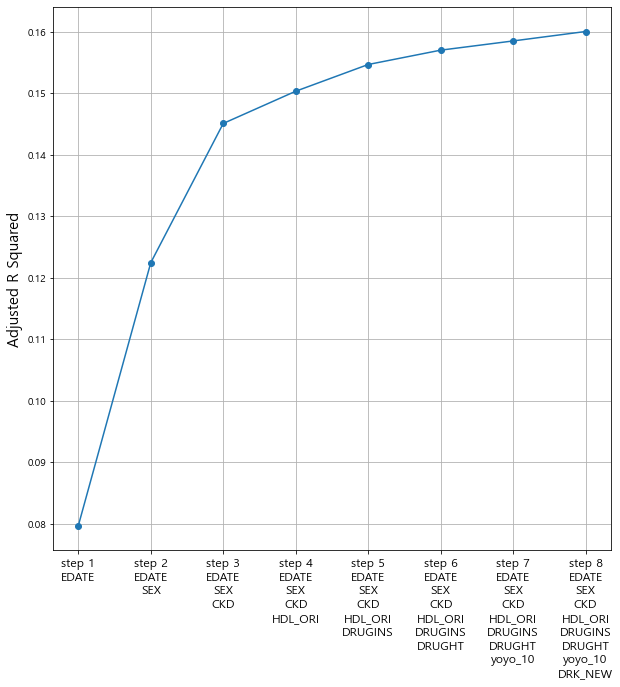

In [127]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [222]:
X = df[selected_variables]
y = df.eGFR_change

In [223]:
y

0       -5.162891
1      -13.231637
2      -13.417317
3       -6.634148
4      -11.026933
          ...    
1464    -4.027190
1465   -23.355157
1466   -12.112938
1467   -27.245885
1468    -9.855736
Name: eGFR_change, Length: 1469, dtype: float64

In [225]:
# bias를 위한 상수항 추가

X = sm.add_constant(X, has_constant = "add")
X

,const,EDATE,SEX,CKD,HDL_ORI,DRUGINS,DRUGHT,yoyo_10,DRK_NEW
0,1.0,200912.0,1,0.0,45.0,1.0,1.0,0.0,2
1,1.0,201009.0,1,0.0,43.0,1.0,1.0,0.0,5
2,1.0,201005.0,2,0.0,37.0,1.0,2.0,0.0,1
3,1.0,201010.0,1,0.0,48.0,1.0,1.0,0.0,2
4,1.0,201009.0,1,0.0,42.0,1.0,2.0,0.0,1
...,...,...,...,...,...,...,...,...,...
1464,1.0,201011.0,2,0.0,67.0,1.0,1.0,0.0,2
1465,1.0,201006.0,1,0.0,40.0,1.0,1.0,0.0,3
1466,1.0,200909.0,1,0.0,54.0,1.0,1.0,0.0,5
1467,1.0,200908.0,2,0.0,44.0,1.0,1.0,0.0,1


In [226]:
# OLS 

model = sm.OLS(y,X)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            eGFR_change   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     35.96
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           2.80e-52
Time:                        15:02:03   Log-Likelihood:                -5752.0
No. Observations:                1469   AIC:                         1.152e+04
Df Residuals:                    1460   BIC:                         1.157e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.444e+04   1400.397    -10.315      0.000   -1.72e+04   -1.17e+04
EDATE          0.0719      0.007     10.317      0.000       0.058       0.086
SEX           -5.2102      0.769     -6.772      0.000      -6.719      -3.701
CKD          -10.5903      1.874     -5.650      0.000     -14.267      -6.914
HDL_ORI        0.0742      0.031      2.430      0.015       0.014       0.134
DRUGINS      -11.3047      4.102     -2.756      0.006     -19.351      -3.259
DRUGHT        -1.6429      0.724     -2.270      0.023      -3.063      -0.223
yoyo_10        3.7977      1.983      1.915      0.056      -0.092       7.687
DRK_NEW        0.5896      0.308      1.915      0.056      -0.014       1.193
==============================================================================
Omnibus:                       13.473   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.942
Skew:                           0.166   Prob(JB):                      0.00255
Kurtosis:                       2.708   Cond. No.                     8.86e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
gamma_model = sm.GLM(y, X, family=sm.families.Gamma())
gamma_results = gamma_model.fit()

gamma_results.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:735: RuntimeWarning: invalid value encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            eGFR_change   No. Observations:                 1469
Model:                            GLM   Df Residuals:                     1458
Model Family:                   Gamma   Df Model:                           10
Link Function:          inverse_power   Scale:                         0.96703
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 20 Oct 2021   Deviance:                       17807.
Time:                        13:33:37   Pearson chi2:                 1.43e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0411      0.010     -4.160      0.000      -0.061      -0.022
yoyo_03_0.0    -0.0137      0.005     -2.587      0.010      -0.024      -0.003
yoyo_03_1.0    -0.0128      0.006     -2.311      0.021      -0.024      -0.002
yoyo_03_2.0    -0.0200      0.006     -3.417      0.001      -0.032      -0.009
yoyo_03_3.0     0.0054      0.010      0.549      0.583      -0.014       0.025
yoyo_05_0.0    -0.0171      0.009     -1.887      0.059      -0.035       0.001
yoyo_05_1.0    -0.0181      0.009     -1.960      0.050      -0.036    2.51e-06
yoyo_05_2.0    -0.0081      0.009     -0.874      0.382      -0.026       0.010
yoyo_05_3.0     0.0021      0.018      0.115      0.909      -0.034       0.038
yoyo_07_0.0    -0.0062      0.010     -0.603      0.547      -0.026       0.014
yoyo_07_1.0     0.0030      0.010      0.290      0.772      -0.017       0.023
yoyo_07_2.0    -0.0069      0.014     -0.482      0.630      -0.035       0.021
yoyo_07_3.0    -0.0311      0.027     -1.142      0.253      -0.085       0.022
yoyo_10_0.0     0.0035      0.011      0.318      0.750      -0.018       0.025
yoyo_10_1.0    -0.0135      0.013     -1.026      0.305      -0.039       0.012
yoyo_10_2.0    -0.0311      0.027     -1.142      0.253      -0.085       0.022
===============================================================================
"""